<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
    <br/>
<font color=#FF7500>
Sharif University of Technology - Departmenet of Computer Engineering
</font>
<p></p>
<font color=blue>
Linear Algebra 
<br>
Prof. Hamid R. Rabiee
<br>
Dr. Maryam Ramezani
</font>
<br/>
<br/>
Fall 2022

</div>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Project - Q2 <br>
Jabr News

(65% of the overall project grade)
            	<br/>
			</font>
<font size=4>
			<br/><br/>
<font color=red>
Please run all the cells.
     </font>
</font>
<br>
<font size=3 color=grey>
</font>
    </div>

Name: AmirHossein Naghi Razlighi
<br>
Student Number: 99102423


# JABR NEWS
The JabrNews system, which has been established recently, has managed to find a lot of news from all over the world daily and put it in its system. Despite the site being new, it has attracted alot of fans.
<br>
<br>
This system receives a lot of news every day, most of which are about certain topics, and should be classified by a system. Unfortunately, due to the low speed of the internet, today their system does not have the ability to do the task, so they need your help to do this for them.
<br>
<br>
Take the following steps to fulfil the task.
<br>
<br>
Import any libraries that you may need.


 

In [2]:
import numpy as np
import pandas as pd
import nltk
import os

In [3]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/amirhossein/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Data Matrix ( 30 points )
<br>
<br>
First, we need to create the data matrix to be able to work with it. We consider each file as a row of this matrix.
<br>
<br>
Before creating this matrix, it is necessary to prepare the corpus related to these files. Corpus is the set of all words that are in the text files. Also, note that you will be given a file called stopwords that you should not include in the corpus.
<br>
<br>
The second thing you should consider is that words like Programming, Programmer are counted as one word. For this, you can use the nltk library.
<br>
<br>
(If you have a problem in building the corpus or the number of words in the corpus exceeds some limit, you can first find the number of repetitions of each word in the corpus and use a limited number of them.)



### Subtask 1 : Create corpus 

In [4]:

with open('data/labels.txt', 'r') as f:
    labels = f.readlines()
labels = [l.strip().split(':') for l in labels]
labels = {l[1] for l in labels}

with open('data/stopwords.txt', 'r') as f:
    stopwords = f.readlines()
stopwords = [l.strip() for l in stopwords]


def clean_text(text):
    text = text.lower()
    text = nltk.tokenize.word_tokenize(text)
    text = [w for w in text if w not in stopwords]
    text = ''.join(text)
    return text


corpus = []
for word in labels:
    corpus.append(word.lower())

corpus[:10]

['gold',
 'orange',
 'lumber',
 'pet-chem',
 'dmk',
 'rice',
 'gas',
 'cpu',
 'iron-steel',
 'heat']

Now, according to the corpus we created, we need to create an initial data matrix. In such a way that the index $ij$ in the matrix $Y$ has the value $k$ if the word $j$ is repeated $k$ times in the corpus in the text $i$.


### Subtask 2 : Create initial data matrix

In [5]:
number_of_files = len(os.listdir('data/news'))
Y = np.zeros((number_of_files, len(labels)))

for i, file in enumerate(os.listdir('data/news')):
    with open('data/news/' + file, 'r', encoding='windows-1252') as f:
        text = f.read()
        text = clean_text(text)
        for j, label in enumerate(labels):
            Y[i][j] = text.count(label)


In this part, we want to complete the data matrix. Consider the following definitions:
$$
t_{ij} = Y_{ij}
$$
$$
\text{idf}_{i} = \text{Number of text files having word }i\text{ in corpus}
$$
$$N = \text{Number of text files}$$

Note that here $t$ is the number of word repetitions in a text. According to these definitions, the data matrix is ​​defined as follows:

$$
X_{ij} = t_{ij}\times\text{Log}(\frac{N}{\text{idf}_j})
$$

This method is called tf-idf. Finally, each row of the data matrix must have a norm of 1.

### Subtask 3 : Create Data matrix

In [6]:

X = np.zeros((number_of_files, len(labels)))

idf = np.ones((len(labels), 1))

for i, label in enumerate(labels):
    non_zero_count = np.count_nonzero(Y[:, i])
    if non_zero_count:
        idf[i] = np.log(number_of_files / non_zero_count)
    else:
        idf[i] = 0


for i in range(number_of_files):
    for j in range(len(labels)):
        X[i][j] = Y[i][j] * idf[j]

for i in range(number_of_files):
    row_norm = np.linalg.norm(X[i])
    if row_norm:
        X[i] = X[i] / row_norm

print(np.linalg.norm(X[2]))


1.0


# SVD ( 30 points )



Here we present the first solution. Using SVD, we try to write the matrix $X$ which is $N\times\text{Corpus}$ in the form $VU$ in which we have $V_{N\times k}$ and $U_{k\times C}$.



(If the execution of SVD takes a long time, you can limit the number of words in the corpus as desired.)


### Subtask 1 : Run SVD on Data Matrix


In [7]:
# Run SVD on X
U, s, V = np.linalg.svd(X, full_matrices=False)

Now, having the SVD answer, take an arbitrary number (for example, $k = 10$) to pick the largest values of $\sigma$ and select its corresponding vectors in $U$ and $V$. (Multiply the value of $\sigma$ in one of $U$ or $V$ so that we can write $X$ as a product of $VU$.)
    <br>
    <br>
    $$
    X = VU
    $$
    <br>
    <br>
Now if we have:
<br>
    <br>
    $$
    V = \begin{bmatrix}v_1^T\\\vdots\\v_N^T\end{bmatrix}\quad,\quad v_i \in \mathbb{R}^k\quad,\quad U\in\mathbb{R}^{k\times C}
    $$
    <br>
    <br>
As a result, each line of $X$ is written as follows.
<br>
    <br>
    $$
    X = \begin{bmatrix}v_1^TU\\\vdots\\v_N^TU\end{bmatrix}
    $$
    <br>
    <br>
Now, this expression can be interpreted in such a way that each of the $k$ rows in $U$ specify a specific topic. And each of the $v_i^t$ elements specifies how much the text $i$ is related to that topic. Basically, we are trying to display each text as a linear combination of several different topics.
<br>
    <br>
For $k=10$ different topics, specify which topic each text belongs to.
### Subtask 2 : Use SVD for clustering

In [12]:
# Use SVD for clustering
# having the SVD answer, take an arbitrary number (for example, $k = 10$) to pick the largest values of $\sigma$ and select its corresponding vectors in $U$ and $V$. (Multiply the value of $\sigma$ in one of $U$ or $V$ so that we can write $X$ as a product of $VU$.)
k = 10
Uk = U[:, :k]
Vk = V[:k, :]
Sk = np.diag(s[:k])

# Now, we can write $X$ as a product of $VU$.
Xk = Uk @ Sk @ Vk

# Now, this expression can be interpreted in such a way that each of the $k$ rows in $U$ specify a specific topic. And each of the $v_i^t$ elements specifies how much the text $i$ is related to that topic. Basically, we are trying to display each text as a linear combination of several different topics.
# for k = 10 different topics, specify which topics are the most important for each text.
labels_sub_2 = []
for i in range(number_of_files):
    print('Text {}:'.format(i))
    arg_max_topic = np.argmax(Uk[i])
    print('Most important topic: {}'.format(arg_max_topic))
    labels_sub_2.append(arg_max_topic)


Text 0:
Most important topic: 4
Text 1:
Most important topic: 1
Text 2:
Most important topic: 8
Text 3:
Most important topic: 9
Text 4:
Most important topic: 8
Text 5:
Most important topic: 5
Text 6:
Most important topic: 4
Text 7:
Most important topic: 4
Text 8:
Most important topic: 5
Text 9:
Most important topic: 2
Text 10:
Most important topic: 1
Text 11:
Most important topic: 4
Text 12:
Most important topic: 8
Text 13:
Most important topic: 6
Text 14:
Most important topic: 9
Text 15:
Most important topic: 1
Text 16:
Most important topic: 6
Text 17:
Most important topic: 6
Text 18:
Most important topic: 1
Text 19:
Most important topic: 7
Text 20:
Most important topic: 7
Text 21:
Most important topic: 9
Text 22:
Most important topic: 3
Text 23:
Most important topic: 2
Text 24:
Most important topic: 4
Text 25:
Most important topic: 3
Text 26:
Most important topic: 2
Text 27:
Most important topic: 9
Text 28:
Most important topic: 1
Text 29:
Most important topic: 4
Text 30:
Most import

In the $U$ matrix where the topics are in the rows, we know that every 2 rows are perpendicular to each other. Is this assumption correct for different subjects?
    <br>
    <br>
    What does it mean if the coefficient of a subject is negative for a particular text? Do we have the power to interpret negative coefficients?

In this part, we want to measure the accuracy of the model. At first, it is necessary to project the $X$ matrix that we made earlier using PCA, on 2 dimensions and assign to each of points a color corresponding to their labels that you obtained in Subtask 2.

### Subtask 3 : Use PCA on X and labels

In [9]:
import sklearn

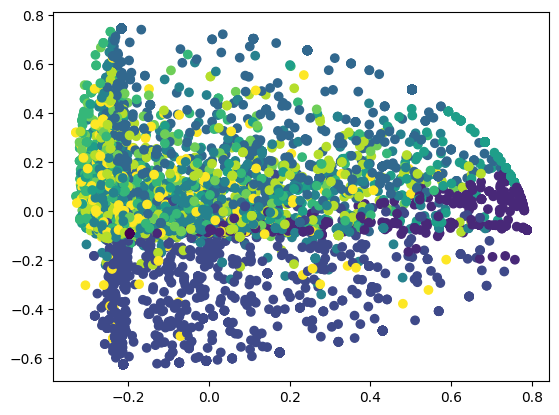

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_2d = pca.fit_transform(Xk)

colors = {label: idx for idx, label in enumerate(set(labels_sub_2))}
label_colors = [colors[label] for label in labels_sub_2]

plt.scatter(X_2d[:, 0], X_2d[:, 1], c=label_colors)
plt.show()

# New Factorizaion ( 30 points )



As you must have noticed in the previous section, there is room for improvement compared to the SVD method. Here we introduce a new method that has advantages over SVD.



Here we try to write the matrix $X$ in the form $X \sim WH$. But contrary to the SVD method, we try to ensure that all the domains of $H$ and $W$ are positive, and with this condition, we seek to find $H$ and $W$ that minimize the following function:



$$
    J = \lVert X - WH\lVert^2_F
$$



Use the following algorithm to find such two matrices.



First, create the matrix $W$ and $H$ with random positive elements. Next, repeat the following step max_iter times and save $H, W$ for which we have the least error.
    

$$
    H_{ij} := H_{ij}\frac{(W^TX)_{ij}}{(W^TWH + 10^{-9})_{ij}}
$$
$$
    W_{ij} := W_{ij}\frac{(XH^T)_{ij}}{(WHH^T + 10^{-9})_{ij}}
$$


Considering that the answer of $W$ and $H$ is not unique, it is necessary to set the norm of each row of $H$ equal to 1 in each step after the update and also apply a change in $W$ that the answer of their multiplication Does not change.

### Subtask 1 : Find W, H.

In [47]:
# First, create the matrix $W$ and $H$ with random positive elements.
W = np.random.rand(number_of_files, len(labels))
H = np.random.rand(len(labels), len(labels))

# Next, repeat the following step max_iter times and save $H, W$ for which we have the least error.
max_iter = 100
for iter in range(max_iter):
    H = H * (W.T @ X) / (W.T @ W @ H + 1e-9)
    H = H / (np.linalg.norm(H, axis=0, keepdims=True) + 1e-9)
    W = W * (X @ H.T) / (W @ H @ H.T + 1e-9)
    W = W * np.linalg.norm(X) / (np.linalg.norm(W @ H) + 1e-9)

error = np.linalg.norm(X - W @ H)
print('Error: {}'.format(error))


Error: 6.3221846093571905


Now, as in the previous section, we want to know what topic each text belongs to. Each topic is a row of $H$ and we have no requirement for them to be perpendicular to each other. For $k=10$ determine what topic each text belongs to.
    <br>
    <br>
    As in the previous section, measure the accuracy of this method intuitively.
### Subtask 2 : Use W, H for clustering

In [48]:
# Now, as in the previous section, we want to know what topic each text belongs to. Each topic is a row of $H$ and we have no requirement for them to be perpendicular to each other. For $k=10$ determine what topic each text belongs to.
k = 10
Hk = H[:k, :]
Wk = W[:, :k]

labels_sub_3 = []
for i in range(number_of_files):
    print('Text {}:'.format(i))
    arg_max_topic = np.argmax(Wk[i])
    print('Most important topic: {}'.format(arg_max_topic))
    labels_sub_3.append(arg_max_topic)


Text 0:
Most important topic: 0
Text 1:
Most important topic: 2
Text 2:
Most important topic: 8
Text 3:
Most important topic: 5
Text 4:
Most important topic: 5
Text 5:
Most important topic: 0
Text 6:
Most important topic: 4
Text 7:
Most important topic: 6
Text 8:
Most important topic: 0
Text 9:
Most important topic: 5
Text 10:
Most important topic: 2
Text 11:
Most important topic: 4
Text 12:
Most important topic: 2
Text 13:
Most important topic: 8
Text 14:
Most important topic: 5
Text 15:
Most important topic: 2
Text 16:
Most important topic: 8
Text 17:
Most important topic: 8
Text 18:
Most important topic: 2
Text 19:
Most important topic: 0
Text 20:
Most important topic: 5
Text 21:
Most important topic: 5
Text 22:
Most important topic: 0
Text 23:
Most important topic: 1
Text 24:
Most important topic: 1
Text 25:
Most important topic: 2
Text 26:
Most important topic: 5
Text 27:
Most important topic: 6
Text 28:
Most important topic: 2
Text 29:
Most important topic: 8
Text 30:
Most import

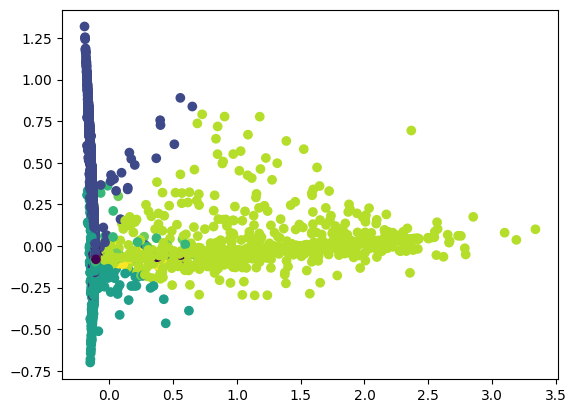

In [49]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(Wk)

colors = {label: idx for idx, label in enumerate(set(labels_sub_3))}
label_colors = [colors[label] for label in labels_sub_3]

plt.scatter(X_2d[:, 0], X_2d[:, 1], c=label_colors)
plt.show()



Has the constrain on $W, H$ helped us with the clustering? Explain.

In this section, in addition to specifying the topic of each text, you must also specify the topic itself. This means that some of the largest values in row $i$ in matrix $H$, which is a word in the corpus, determine what the general scope of a subject is.

### Subtask 3 : Show some of the topics

In [52]:
k = 10

Hk = H[:k, :]
Wk = W[:, :k]

for i in range(k):
    print('Topic {}:'.format(i))
    arg_max_word = np.argmax(Hk[i])
    print('Most important word: {}'.format(corpus[arg_max_word]))


Topic 0:
Most important word: oat
Topic 1:
Most important word: acq
Topic 2:
Most important word: dlr
Topic 3:
Most important word: nkr
Topic 4:
Most important word: housing
Topic 5:
Most important word: tin
Topic 6:
Most important word: crude
Topic 7:
Most important word: gnp
Topic 8:
Most important word: trade
Topic 9:
Most important word: soybean
